# Wrangling WeRateDog Dataset

## Gathering

#### 1.Gathering data from the given downloaded text file

In [34]:
import requests
import json
import pandas as pd
import os
import numpy as np
df=pd.read_csv('twitter-archive-enhanced.csv')
df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


#### 2.Gathering the data from the url using request

In [5]:
df_list=[]
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response=requests.get(url)
with open('jpg.txt','wb') as file:
    file.write(response.content)

with open('jpg.txt','r') as f:
    first=f.readline()
    lines=f.readlines()
    for line in lines:
        tweet_id=line.split()[0]
        jpg_url=line.split()[1]
        img_num=line.split()[2]
        p1=line.split()[3]
        p1_confg=line.split()[4]
        p1_dog=line.split()[5]
        p2=line.split()[6]
        p2_confg=line.split()[7]
        p2_dog=line.split()[8]
        p3=line.split()[9]
        p3_confg=line.split()[10]
        p3_dog=line.split()[11]
        
        df_list.append({
            'tweet_id':tweet_id,
            'jpg_url':jpg_url,
            'img_num':img_num,
            'p1':p1,
            'p1_confg':p1_confg,
            'p1_dog':p1_dog,
            'p2':p2,
            'p2_confg':p2_confg,
            'p2_dog':p2_dog,
            'p3':p3,
            'p3_confg':p3_confg,
            'p3_dog':p3_dog
        })

df_img=pd.DataFrame(df_list,columns=['tweet_id','jpg_url','img_num','p1','p1_confg','p1_dog','p2','p2_confg','p2_dog','p3','p3_confg','p3_dog']) 


In [32]:
df_img.head(1)

,tweet_id,jpg_url,img_num,p1,p1_confg,p1_dog,p2,p2_confg,p2_dog,p3,p3_confg,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.0614285,True


#### 3.Gathering data from the downloaded tweet-json.txt file

In [6]:
tweet=[]
with open('tweet-json.txt','r') as file:
    lines=file.readlines()
    for line in lines:
        data=json.loads(line)
        tweet_ID=data.get("id")
        retweet_count=data.get("retweet_count")
        favorite_count=data.get("favorite_count")
        
        tweet.append({
            'tweet_ID':tweet_ID,
            'retweet_count':retweet_count,
            'favorite_count':favorite_count
        })
df_tweet=pd.DataFrame(tweet,columns=['tweet_ID','retweet_count','favorite_count'])

In [5]:
df_tweet.head(1)

,tweet_ID,retweet_count,favorite_count
0,892420643555336193,8853,39467


# Assessing

### 1.Visual Assessment

In [14]:
df

#Found many values that are missing

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
df_img

#It is looking much better than the previous dataset.However we can see
#confg columns have some values which are having unecessarily many digits
#after the decimal point.

,tweet_id,jpg_url,img_num,p1,p1_confg,p1_dog,p2,p2_confg,p2_dog,p3,p3_confg,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.0614285,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.07419169999999999,True,Rhodesian_ridgeback,0.07201,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.13858399999999998,True,bloodhound,0.11619700000000001,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.0161992,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.9330120000000001,False,mud_turtle,0.04588540000000001,False,terrapin,0.017885299999999996,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279399999999995,True,fur_coat,0.0544486,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014593799999999999,False,golden_retriever,0.00795896,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.08208610000000001,True


In [16]:
df_tweet

#In the first glance it is looking perfect..!!

,tweet_ID,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


### 2.Programmatic Assessment

In [17]:
df.info() 
# We can see many columns are missing many values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [5]:
df_img.info()
# Issues with the dtypes of the columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null object
p1          2075 non-null object
p1_confg    2075 non-null object
p1_dog      2075 non-null object
p2          2075 non-null object
p2_confg    2075 non-null object
p2_dog      2075 non-null object
p3          2075 non-null object
p3_confg    2075 non-null object
p3_dog      2075 non-null object
dtypes: object(12)
memory usage: 194.6+ KB


In [6]:
df_tweet.info()
# This is lookin good.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_ID          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [9]:
df_img.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_confg,p1_dog,p2,p2_confg,p2_dog,p3,p3_confg,p3_dog
302,671504605491109889,https://pbs.twimg.com/media/CVGp4LKWoAAoD03.jpg,1,toy_poodle,0.259115,True,bath_towel,0.177669,False,Maltese_dog,0.0717125,True
450,674739953134403584,https://pbs.twimg.com/media/CV0oaHFW4AA9Coi.jpg,1,Dandie_Dinmont,0.17591500000000002,True,black-footed_ferret,0.0965343,False,toy_poodle,0.0641447,True
847,695409464418041856,https://pbs.twimg.com/media/CaaXN5LUYAEzAh-.jpg,1,pug,0.997445,True,bull_mastiff,0.00174855,True,Pekinese,0.00030440400000000004,True
1432,773308824254029826,https://pbs.twimg.com/media/CrtYRMEWIAAUkCl.jpg,1,shopping_cart,0.572349,False,Labrador_retriever,0.15140599999999999,True,shopping_basket,0.107102,False
1652,809808892968534016,https://pbs.twimg.com/media/CwS4aqZXUAAe3IO.jpg,1,Labrador_retriever,0.8616510000000001,True,golden_retriever,0.0444618,True,Staffordshire_bullterrier,0.016496700000000003,True


In [10]:
df_tweet.sample(5)

,tweet_ID,retweet_count,favorite_count
1141,727314416056803329,834,3623
1399,699434518667751424,577,2384
289,838150277551247360,370,1824
426,821153421864615936,10,280
110,871032628920680449,3999,23255


In [72]:
df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
123,868880397819494401,NaN,NaN,2017-05-28 17:23:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Walter. He won't start hydrotherapy wi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
1698,681193455364796417,NaN,NaN,2015-12-27 19:22:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Aspen. He's astronomically fluffy. I w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681193455...,11,10,Aspen,None,None,None,None
1675,682242692827447297,NaN,NaN,2015-12-30 16:51:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Samson. He patrols his waters on the b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682242692...,11,10,Samson,None,None,None,None
1022,746542875601690625,NaN,NaN,2016-06-25 03:17:46 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here's a golden floofer helping with the groce...,NaN,NaN,NaN,https://vine.co/v/5uZYwqmuDeT,11,10,None,None,floofer,None,None
1044,743609206067040256,NaN,NaN,2016-06-17 01:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Stark. He just had his first ice cream co...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743609206...,10,10,Stark,None,None,None,None


In [73]:
# We see that dog stages columns are showing None in almost row..let's check

sum(df.doggo.duplicated())        #2354 duplicate values
sum(df.floofer.duplicated())      #2354      ""
sum(df.pupper.duplicated())       #2354      ""
sum(df.puppo.duplicated())        #2354      ""


2354

In [10]:
df.describe()
# We found that rating_denominator min. value is 0 which is not possible.

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [8]:
df.rating_denominator.value_counts()
# We have one row with 0 rating_denominator value

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [74]:
df_img.describe()
# Here we find that jpg_url have some duplicate values.

,tweet_id,jpg_url,img_num,p1,p1_confg,p1_dog,p2,p2_confg,p2_dog,p3,p3_confg,p3_dog
count,2075,2075,2075,2075,2075,2075,2075,2075,2075,2075,2075,2075
unique,2075,2009,4,378,2006,2,405,2004,2,408,2006,2
top,669214165781868544,https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg,1,golden_retriever,0.25485599999999997,True,Labrador_retriever,0.0693617,True,Labrador_retriever,0.07853049999999999,True
freq,1,2,1780,150,2,1532,104,3,1553,79,2,1499


In [56]:
df_img.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_confg    2006
p1_dog         2
p2           405
p2_confg    2004
p2_dog         2
p3           408
p3_confg    2006
p3_dog         2
dtype: int64

In [39]:
sum(df_img.jpg_url.duplicated())
# 66 duplicate values of jpg_url in df_img dataset.

66

In [75]:
df_tweet.describe()
# It is looking fine.

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [11]:
sum(df_tweet.tweet_ID.duplicated())

0

In [77]:
all_columns=pd.Series(list(df) + list(df_img) + list(df_tweet))
all_columns[all_columns.duplicated()]
# We can see that tweet_id column is repeating.

17    tweet_id
29    tweet_id
dtype: object

### Quality Issues

#### df dataset

- Lots of missing values in df dataset columns like in_reply_to_status_id,     in_reply_to_user_id, retweed_status_id, retweeted_user_status_id, retweeted_status_user_id
- Irrelevant and duplicate dog names like a, an, etc.
- tweet_id column should be an object not int or float.
- rating_numerator should be float

#### df_img dataset

- Unnecessary repeating numbers after decimal point in confg columns of df_img dataset.
- In df_img p1_confg, p2_confg, p3_confg should be of float type.
- Duplicate values of jpg_url col in df_img dataset.

#### df_tweet dataset

- Changing tweet_ID col name to tweet_id.
- Retweet_count and favorite_count should be integers not floats.

### Tidiness Issues

- Retweet_count and favorite_count should be part of df dataset.
- The 4 different columns doggo, floofer, pupper and puppo, are all relative to the same variable that identifies the stage of dog 

## Cleaning

#### Cleaning df dataset issues..

In [52]:
df_clean=df.copy()

#### Define

- In the below columns alomost all values are missing so it's better to drop them.

#### Code

In [53]:
df_clean.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],inplace=True)

#### Test

In [54]:
df_clean.head(2)

# Unwanted columns are deleted.

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


#### Define

- Irrelevant and duplicate dog names like a, an, such, etc which cannot be valid names for a dog so let's remove them.

#### Code

In [55]:
df_clean=df_clean[df_clean.name.str.istitle()]

#### Test

In [11]:
df_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


#### Define

- tweet_id column should be an object neither int nor float because they are not numeric and aren't intended to perform calculations

#### Code

In [56]:
df_clean.tweet_id=df_clean.tweet_id.astype(str)

#### Test

In [57]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2241 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2241 non-null object
timestamp             2241 non-null object
source                2241 non-null object
text                  2241 non-null object
expanded_urls         2182 non-null object
rating_numerator      2241 non-null int64
rating_denominator    2241 non-null int64
name                  2241 non-null object
doggo                 2241 non-null object
floofer               2241 non-null object
pupper                2241 non-null object
puppo                 2241 non-null object
dtypes: int64(2), object(10)
memory usage: 227.6+ KB


#### Define

- Rating_numerator column should be float

#### Code

In [58]:
df_clean.rating_numerator=df_clean.rating_numerator.astype(float)
df_clean.rating_denominator=df_clean.rating_denominator.astype(float)

#### Test

In [59]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2241 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2241 non-null object
timestamp             2241 non-null object
source                2241 non-null object
text                  2241 non-null object
expanded_urls         2182 non-null object
rating_numerator      2241 non-null float64
rating_denominator    2241 non-null float64
name                  2241 non-null object
doggo                 2241 non-null object
floofer               2241 non-null object
pupper                2241 non-null object
puppo                 2241 non-null object
dtypes: float64(2), object(10)
memory usage: 227.6+ KB


#### Cleaning df_img dataset issues..

In [60]:
df_img_clean=df_img.copy()

#### Define

- Unncessary repeating numbers after decimal point in confg columns so we will truncate the values of the columns.

#### Code

In [61]:
df_img_clean.p1_confg=df_img_clean.p1_confg.str[:7]
df_img_clean.p2_confg=df_img_clean.p2_confg.str[:7]
df_img_clean.p3_confg=df_img_clean.p3_confg.str[:7]

#### Test

In [62]:
df_img_clean.head(10)

,tweet_id,jpg_url,img_num,p1,p1_confg,p1_dog,p2,p2_confg,p2_dog,p3,p3_confg,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.46507,True,collie,0.15666,True,Shetland_sheepdog,0.06142,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.50682,True,miniature_pinscher,0.07419,True,Rhodesian_ridgeback,0.07201,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.59646,True,malinois,0.13858,True,bloodhound,0.11619,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.40814,True,redbone,0.36068,True,miniature_pinscher,0.22275,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.56031,True,Rottweiler,0.24368,True,Doberman,0.15462,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.65113,True,English_springer,0.26378,True,Greater_Swiss_Mountain_dog,0.01619,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.93301,False,mud_turtle,0.04588,False,terrapin,0.01788,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.69251,True,Tibetan_mastiff,0.05827,True,fur_coat,0.05444,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.96246,False,shopping_basket,0.01459,False,golden_retriever,0.00795,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.20149,True,komondor,0.19230,True,soft-coated_wheaten_terrier,0.08208,True


#### Define

- Changing the dataype of tweet_id and confg columns as they are in wrong dataype.

#### Code

In [63]:
df_img_clean.tweet_id=df_img_clean.tweet_id.astype(int)
df_img_clean.p1_confg=df_img_clean.p1_confg.astype(float)
df_img_clean.p2_confg=df_img_clean.p2_confg.astype(float)

#### Test

In [64]:
df_img_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null object
p1          2075 non-null object
p1_confg    2075 non-null float64
p1_dog      2075 non-null object
p2          2075 non-null object
p2_confg    2075 non-null float64
p2_dog      2075 non-null object
p3          2075 non-null object
p3_confg    2075 non-null object
p3_dog      2075 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 194.6+ KB


#### Define

- As we find that jpg_url has duplicate values so we have to remove them.

#### Code

In [65]:
df_img_clean=df_img_clean.drop_duplicates(subset='jpg_url',keep='last')

#### Test

In [66]:
df_img_clean.shape

(2009, 12)

#### Cleaning df_tweet issues..

#### Define

- Renaming the tweet_id column name.

#### Code

In [67]:
df_tweet.rename(columns={'tweet_ID':'tweet_id'},inplace=True)

#### Test

In [68]:
# As in df dataset we change the datatype of tweet_id to object here we
# have to do the same.
df_tweet.tweet_id=df_tweet.tweet_id.astype(str)


df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


#### Cleaning tidiness issues 1..

In [69]:
df_tweet_clean=df_tweet.copy()

#### Define

- As all of the datasets are attributes of dog so they all should form a single master dataset.

#### Code

In [70]:
df_clean=pd.merge(df_clean,df_tweet_clean,on='tweet_id',how='left')

#### Test

In [71]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,8853.0,39467.0
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,6514.0,33819.0
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,4328.0,25461.0
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None,8964.0,42908.0
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None,9774.0,41048.0


#### Define

- The 4 different columns doggo, floofer, pupper and puppo, are all relative to the same variable that identifies the stage of dog so we make a single column DogStage and melt all the 4 columns into single one.

#### Code

In [73]:
# handling none values
df_clean.doggo.replace('None', '', inplace=True)
df_clean.floofer.replace('None', '', inplace=True)
df_clean.pupper.replace('None', '', inplace=True)
df_clean.puppo.replace('None', '', inplace=True)

In [74]:
# Making a new column dog_stage which is equal to sum of all 4 columns
df_clean['dog_stage'] = df_clean.doggo + df_clean.floofer + df_clean.pupper + df_clean.puppo

In [75]:
# Using delimiter to separate values.
df_clean.loc[df_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
df_clean.loc[df_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
df_clean.loc[df_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

In [76]:
df_clean.loc[df_clean.dog_stage == '', 'dog_stage'] = np.nan

In [77]:
df_clean.drop(columns=['doggo','floofer','pupper','puppo'],inplace=True)

#### Test

In [78]:
df_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,8853.0,39467.0,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,6514.0,33819.0,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,4328.0,25461.0,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,8964.0,42908.0,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,9774.0,41048.0,NaN
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,3261.0,20562.0,NaN
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,2158.0,12041.0,NaN
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,None,16716.0,56848.0,NaN
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,4429.0,28226.0,NaN
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,7711.0,32467.0,doggo


In [80]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2241 entries, 0 to 2240
Data columns (total 11 columns):
tweet_id              2241 non-null object
timestamp             2241 non-null object
source                2241 non-null object
text                  2241 non-null object
expanded_urls         2182 non-null object
rating_numerator      2241 non-null float64
rating_denominator    2241 non-null float64
name                  2241 non-null object
retweet_count         2239 non-null float64
favorite_count        2239 non-null float64
dog_stage             364 non-null object
dtypes: float64(4), object(7)
memory usage: 210.1+ KB


In [81]:
# Combinig df_img dataset into df
df_img_clean.tweet_id=df_img_clean.tweet_id.astype(str)
df_clean=pd.merge(df_clean,df_img_clean,on='tweet_id',how='left')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2241 entries, 0 to 2240
Data columns (total 22 columns):
tweet_id              2241 non-null object
timestamp             2241 non-null object
source                2241 non-null object
text                  2241 non-null object
expanded_urls         2182 non-null object
rating_numerator      2241 non-null float64
rating_denominator    2241 non-null float64
name                  2241 non-null object
retweet_count         2239 non-null float64
favorite_count        2239 non-null float64
dog_stage             364 non-null object
jpg_url               1905 non-null object
img_num               1905 non-null object
p1                    1905 non-null object
p1_confg              1905 non-null float64
p1_dog                1905 non-null object
p2                    1905 non-null object
p2_confg              1905 non-null float64
p2_dog                1905 non-null object
p3                    1905 non-null object
p3_confg              1905 n

### Creating Final Master Dataset

In [82]:
df_clean.to_csv('weratedogmaster.csv',index=False)

### Some Visualizations

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv('weratedogmaster.csv')
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,img_num,p1,p1_confg,p1_dog,p2,p2_confg,p2_dog,p3,p3_confg,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,8853.0,39467.0,...,1.0,orange,0.09704,False,bagel,0.08585,False,banana,0.07611,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,6514.0,33819.0,...,1.0,Chihuahua,0.32358,True,Pekinese,0.09064,True,papillon,0.06895,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,4328.0,25461.0,...,1.0,Chihuahua,0.71601,True,malamute,0.07825,True,kelpie,0.03137,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,8964.0,42908.0,...,1.0,paper_towel,0.17027,False,Labrador_retriever,0.16808,True,spatula,0.04083,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,9774.0,41048.0,...,2.0,basset,0.55571,True,English_springer,0.22576,True,German_short-haired_pointer,0.17521,True


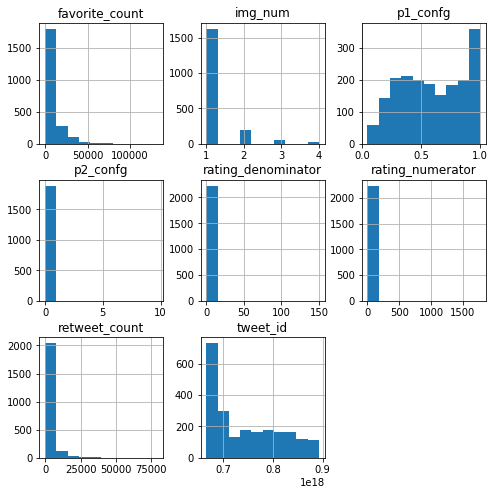

In [84]:
df.hist(figsize=(8,8));

In [85]:
p1=df.groupby('p1_dog').count()['p1']
p1

p1_dog
False     499
True     1406
Name: p1, dtype: int64

In [86]:
p2=df.groupby('p2_dog').count()['p1']
p2

p2_dog
False     480
True     1425
Name: p1, dtype: int64

In [87]:
p3=df.groupby('p3_dog').count()['p1']
p3

p3_dog
False     522
True     1383
Name: p1, dtype: int64

Text(0.5,0,'Predictions of being a dog')

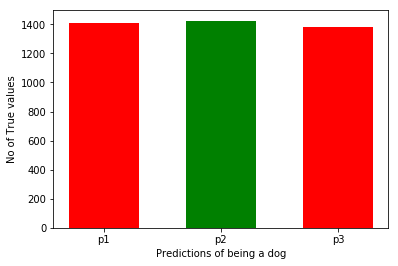

In [89]:
location=[1,2,3]
heights=[p1[1],p2[1],p3[1]]
labels=['p1','p2','p3']
plt.bar(location,heights,color=['red','green'],width=0.6,tick_label=labels)
plt.ylabel('No of True values')
plt.xlabel('Predictions of being a dog')

Text(0.5,1,'Rating_numerator Vs Retweet_count')

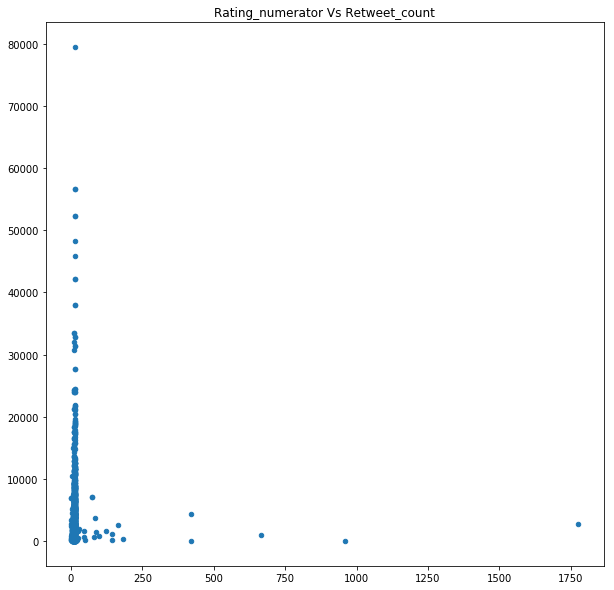

In [90]:
plt.figure(figsize=(10,10))
ax=plt.scatter(df.rating_numerator,df.retweet_count,s=20)
plt.title('Rating_numerator Vs Retweet_count')

Text(0.5,1,'Retweet_count Vs Favorite_count')

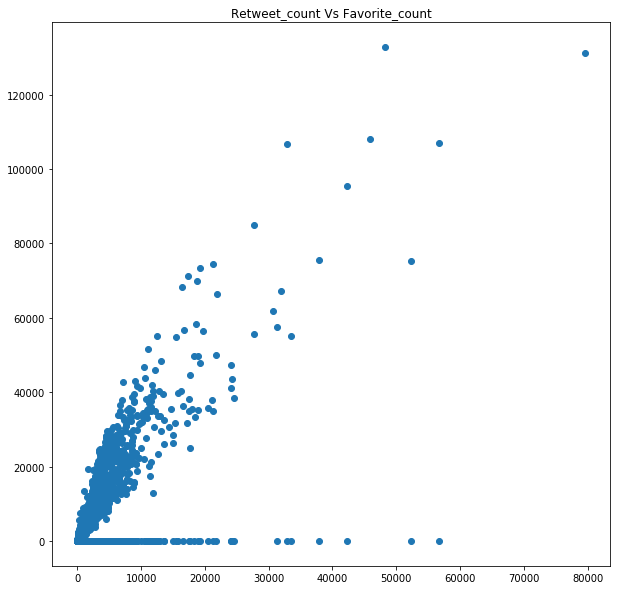

In [91]:
plt.figure(figsize=(10,10))
plt.scatter(df.retweet_count,df.favorite_count)
plt.title('Retweet_count Vs Favorite_count')